In [1]:
import sys
sys.path.append("../src/")

from classic_pid_controller import ClassicPidController
from rabbits import Rabbits
from consys import ConSys
from plot_utils import plot_classic_pid

In [2]:
""" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey
on the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction
with foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time
varying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is 
represented by U (the control signal).

Foxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. 
There is also some noise in the birthrate of foxes, represented by the term D (disturbance).


Task: keep rabbit population stable at initial population.
We assume that wildlife population management always make sure that neither the rabbit population nor the fox population
ever gets lower than 1 individual.
"""

" Rabbits and foxes; We will model a population of rabbits and one of foxes, where the foxes prey\non the rabbits. Rabbits are born at rate a1 and die naturally at rate a2, and die due to interaction\nwith foxes at rate a3. In addition, due to external effects on the rabbits' birth rate, there is a time\nvarying, additive component + a4 sin(a5 · t). Rabbits killed by wildlife population control is \nrepresented by U (the control signal).\n\nFoxes die naturally at rate b1 and are born from interaction with rabbits at rate b2. \nThere is also some noise in the birthrate of foxes, represented by the term D (disturbance).\n\n\nTask: keep rabbit population stable at initial population.\nWe assume that wildlife population management always make sure that neither the rabbit population nor the fox population\never gets lower than 1 individual.\n"

## Rabbits

### Classic PID controller

Epoch 0  mse:  63.621765
Epoch 1  mse:  36.358425
Epoch 2  mse:  31.739946
Epoch 3  mse:  26.66477
Epoch 4  mse:  25.388184
Epoch 5  mse:  22.770908
Epoch 6  mse:  21.7661
Epoch 7  mse:  20.549028
Epoch 8  mse:  19.426264
Epoch 9  mse:  19.039755
Epoch 10  mse:  18.556639
Epoch 11  mse:  18.180746
Epoch 12  mse:  16.23873
Epoch 13  mse:  17.138235
Epoch 14  mse:  16.4463
Epoch 15  mse:  15.5350485
Epoch 16  mse:  15.662903
Epoch 17  mse:  15.142844
Epoch 18  mse:  15.110676
Epoch 19  mse:  14.981518
Epoch 20  mse:  14.6464205
Epoch 21  mse:  14.389078
Epoch 22  mse:  14.41765
Epoch 23  mse:  14.042443
Epoch 24  mse:  13.852567
Epoch 25  mse:  13.45181
Epoch 26  mse:  13.284194
Epoch 27  mse:  13.605417
Epoch 28  mse:  13.105356
Epoch 29  mse:  13.060052
Epoch 30  mse:  13.015552
Epoch 31  mse:  12.677305
Epoch 32  mse:  12.5299425
Epoch 33  mse:  12.852587
Epoch 34  mse:  12.109921
Epoch 35  mse:  12.03777
Epoch 36  mse:  12.218271
Epoch 37  mse:  11.733996
Epoch 38  mse:  12.11518
Epo

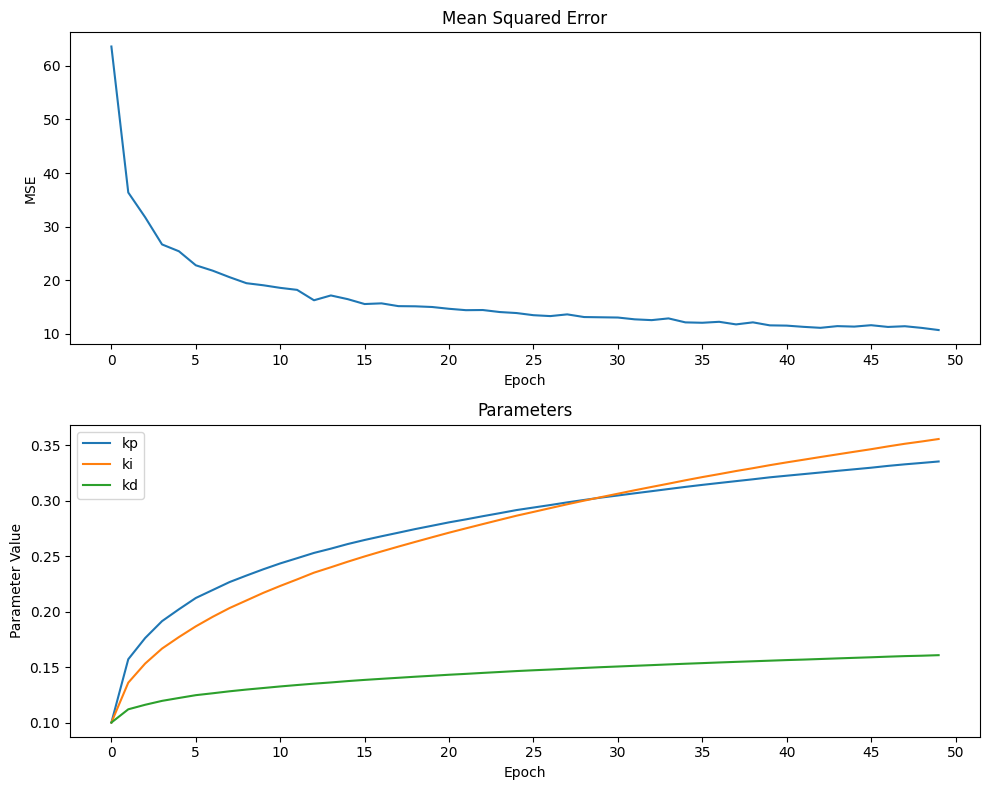

In [3]:
### Rabbit population params:
a1 = 0.35     # rabbit birth rate
a2 = 0.01     # rabbit natural death rate
a3 = 0.05     # rabbit killed by fox rate
a4 = 0.3      # rabbit external birthrate factors param 1
a5 = 0.4      # rabbit external birthrate factors param 2
b1 = 0.3      # fox natural death rate
b2 = 0.015    # fox birthrate
rabbit_start_population = 26
fox_start_population = 3

### ConSys params:
no_epochs = 50
timesteps_per_epoch = 50
learning_rate = 0.0001
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
controller_params = [0.1, 0.1, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = Rabbits(a1, a2, a3, a4, a5, b1, b2, rabbit_start_population, fox_start_population)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params, verbose=True)

plot_classic_pid(mse_list, params_matrix)


In [4]:
print(plant.history)

[Traced<ConcreteArray(30.940000534057617, dtype=float32)>with<JVPTrace(level=2/0)> with
  primal = Array(30.94, dtype=float32)
  tangent = Traced<ShapedArray(float32[])>with<JaxprTrace(level=1/0)> with
    pval = (ShapedArray(float32[]), None)
    recipe = JaxprEqnRecipe(eqn_id=<object object at 0x000002202236FBC0>, in_tracers=(Traced<ShapedArray(float32[]):JaxprTrace(level=1/0)>,), out_tracer_refs=[<weakref at 0x0000022024250B80; to 'JaxprTracer' at 0x0000022024250B30>], out_avals=[ShapedArray(float32[])], primitive=pjit, params={'jaxpr': { lambda ; a:f32[]. let  in (a,) }, 'in_shardings': (UnspecifiedValue,), 'out_shardings': (UnspecifiedValue,), 'resource_env': None, 'donated_invars': (False,), 'name': 'fn', 'keep_unused': False, 'inline': True}, effects=set(), source_info=SourceInfo(traceback=<jaxlib.xla_extension.Traceback object at 0x0000022022FBBCF0>, name_stack=NameStack(stack=(Transform(name='jvp'),)))), Traced<ConcreteArray([[35.056442]], dtype=float32)>with<JVPTrace(level=2/